<a href="https://colab.research.google.com/github/theprashasst/YogaFix/blob/main/Model%20training2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip -q install numpy pandas torch wnb


In [ ]:
!pip install scikit-learn

In [ ]:
import pandas as pd

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split


# import wandb



In [ ]:
df=pd.read_csv("/content/pose_landmarks_data_labeled.csv")
# df['pose_label'] = df['pose_label'].str.replace('_2', '', regex=False)


In [ ]:
# Get unique class names and mappings
class_names=df.pose_label
unique_classes = df.pose_label.unique()
class_to_index = {name: idx for idx, name in enumerate(unique_classes)}
index_to_class = {idx: name for name, idx in class_to_index.items()}

# Numeric label column
df['class_no'] = class_names.map(class_to_index)




In [ ]:
df

,lm_0_x,lm_0_y,lm_0_z,lm_0_vis,lm_1_x,lm_1_y,lm_1_z,lm_1_vis,lm_2_x,lm_2_y,...,lm_31_x,lm_31_y,lm_31_z,lm_31_vis,lm_32_x,lm_32_y,lm_32_z,lm_32_vis,pose_label,class_no
0,0.474155,0.290059,-0.162908,0.999965,0.478606,0.277477,-0.155448,0.999929,0.481032,0.277486,...,0.496552,0.795165,0.088062,0.962782,0.453065,0.806654,0.043338,0.976760,pranamasana,0
1,0.466583,0.300781,-0.177525,0.999919,0.470709,0.287244,-0.168152,0.999850,0.473059,0.286765,...,0.499485,0.801637,0.064510,0.959549,0.451001,0.806090,0.052104,0.972101,pranamasana,0
2,0.465730,0.299038,-0.104304,0.999749,0.469146,0.285445,-0.094034,0.999557,0.471540,0.285161,...,0.497946,0.799523,0.063764,0.958841,0.450583,0.809887,0.029240,0.967937,pranamasana,0
3,0.473353,0.307978,-0.139390,0.999879,0.477164,0.295563,-0.127273,0.999809,0.479074,0.295449,...,0.517552,0.786150,0.061063,0.971229,0.455281,0.800772,0.030397,0.980167,pranamasana,0
4,0.446647,0.306514,-0.063009,0.999948,0.449468,0.295600,-0.046920,0.999931,0.451787,0.295602,...,0.490387,0.800955,0.009007,0.935212,0.445681,0.808367,0.008666,0.938949,hasta_uttanasana,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1517,0.411722,0.491721,-0.143013,0.998933,0.403569,0.479293,-0.165191,0.999277,0.403399,0.476049,...,0.797347,0.676665,-0.076692,0.996660,0.437223,0.675861,0.336128,0.934078,ashwa_sanchalanasana_L_leg_back,8
1518,0.412506,0.491874,-0.141966,0.999157,0.404474,0.479699,-0.164105,0.999421,0.404267,0.476409,...,0.785222,0.689158,-0.085535,0.996467,0.436779,0.682642,0.330264,0.928914,ashwa_sanchalanasana_L_leg_back,8
1519,0.412548,0.487782,-0.144118,0.999254,0.404492,0.475821,-0.165710,0.999488,0.404317,0.472476,...,0.781651,0.687374,-0.082103,0.996540,0.436228,0.677207,0.331575,0.930080,ashwa_sanchalanasana_L_leg_back,8
1520,0.413218,0.494368,-0.147202,0.999274,0.405596,0.482430,-0.170779,0.999502,0.405452,0.479161,...,0.781345,0.681786,-0.048330,0.996703,0.435927,0.665539,0.377015,0.934999,ashwa_sanchalanasana_L_leg_back,8


In [ ]:
X = df.drop(columns=['pose_label'])
X= X.drop(columns=['class_no'])
y = df['class_no']
y=y.astype(int)

In [ ]:
X.to_csv("unprocessed.csv", index=False)
# y.to_csv("unprocessed_y.csv", index=False)

In [ ]:

processed_X_train = pd.read_csv('processed_train_X_data.csv')
y = pd.read_csv('processed_train_y_data.csv')
class_names = pd.read_csv('processed_train_class_names.csv')


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(processed_X_train, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(1217, 132)

In [ ]:
y_test.shape

(305, 1)

In [ ]:
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [ ]:
# Extract X (features), y (one-hot), and numeric class mapping
# X = df.drop(columns=['pose_label'])
# # X = df.drop(columns=['pose_label'])
# X= X.drop(columns=['class_no'])
# y = pd.get_dummies(class_names).astype(int)

In [ ]:
index_to_class

{0: 'pranamasana',
 1: 'hasta_uttanasana',
 2: 'padahastasana_fold',
 3: 'ashwa_sanchalanasana_R_leg_back',
 4: 'dandasana_plank',
 5: 'ashtanga_namaskara_eight_limbs',
 6: 'bhujangasana_cobra',
 7: 'adho_mukha_svanasana_down_dog',
 8: 'ashwa_sanchalanasana_L_leg_back'}

In [ ]:
X.shape

(1522, 132)

In [ ]:
print(X.columns.tolist())


['lm_0_x', 'lm_0_y', 'lm_0_z', 'lm_0_vis', 'lm_1_x', 'lm_1_y', 'lm_1_z', 'lm_1_vis', 'lm_2_x', 'lm_2_y', 'lm_2_z', 'lm_2_vis', 'lm_3_x', 'lm_3_y', 'lm_3_z', 'lm_3_vis', 'lm_4_x', 'lm_4_y', 'lm_4_z', 'lm_4_vis', 'lm_5_x', 'lm_5_y', 'lm_5_z', 'lm_5_vis', 'lm_6_x', 'lm_6_y', 'lm_6_z', 'lm_6_vis', 'lm_7_x', 'lm_7_y', 'lm_7_z', 'lm_7_vis', 'lm_8_x', 'lm_8_y', 'lm_8_z', 'lm_8_vis', 'lm_9_x', 'lm_9_y', 'lm_9_z', 'lm_9_vis', 'lm_10_x', 'lm_10_y', 'lm_10_z', 'lm_10_vis', 'lm_11_x', 'lm_11_y', 'lm_11_z', 'lm_11_vis', 'lm_12_x', 'lm_12_y', 'lm_12_z', 'lm_12_vis', 'lm_13_x', 'lm_13_y', 'lm_13_z', 'lm_13_vis', 'lm_14_x', 'lm_14_y', 'lm_14_z', 'lm_14_vis', 'lm_15_x', 'lm_15_y', 'lm_15_z', 'lm_15_vis', 'lm_16_x', 'lm_16_y', 'lm_16_z', 'lm_16_vis', 'lm_17_x', 'lm_17_y', 'lm_17_z', 'lm_17_vis', 'lm_18_x', 'lm_18_y', 'lm_18_z', 'lm_18_vis', 'lm_19_x', 'lm_19_y', 'lm_19_z', 'lm_19_vis', 'lm_20_x', 'lm_20_y', 'lm_20_z', 'lm_20_vis', 'lm_21_x', 'lm_21_y', 'lm_21_z', 'lm_21_vis', 'lm_22_x', 'lm_22_y', 'lm_2

In [ ]:


# # Separate landmarks (X) and class labels (y)
# X = df.drop(columns=['pose_label'])  # Drop the pose_label column to get the landmarks
# class_names = df['pose_label']  # Extract the class label (pose_label)
# y = pd.get_dummies(class_names).astype(int)  # Convert to one-hot encoding and cast to int

NameError: name 'df' is not defined

In [ ]:
y


,adho_mukha_svanasana_down_dog,ashtanga_namaskara_eight_limbs,ashwa_sanchalanasana_L_leg_back,ashwa_sanchalanasana_R_leg_back,bhujangasana_cobra,dandasana_plank,hasta_uttanasana,padahastasana_fold,pranamasana
0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
706,0,0,1,0,0,0,0,0,0
707,0,0,1,0,0,0,0,0,0
708,0,0,1,0,0,0,0,0,0
709,0,0,1,0,0,0,0,0,0


In [ ]:
# df_onehot = pd.get_dummies(df['pose_label']).astype(int)
# class_names = df.pop('pose_label').unique()
# df = df.drop("pose_label", axis=1)
# df = pd.concat([df, df_onehot], axis=1)


In [ ]:
df

,lm_0_x,lm_0_y,lm_0_z,lm_0_vis,lm_1_x,lm_1_y,lm_1_z,lm_1_vis,lm_2_x,lm_2_y,...,lm_30_vis,lm_31_x,lm_31_y,lm_31_z,lm_31_vis,lm_32_x,lm_32_y,lm_32_z,lm_32_vis,pose_label
0,0.474155,0.290059,-0.162908,0.999965,0.478606,0.277477,-0.155448,0.999929,0.481032,0.277486,...,0.886386,0.496552,0.795165,0.088062,0.962782,0.453065,0.806654,0.043338,0.976760,pranamasana
1,0.466583,0.300781,-0.177525,0.999919,0.470709,0.287244,-0.168152,0.999850,0.473059,0.286765,...,0.849914,0.499485,0.801637,0.064510,0.959549,0.451001,0.806090,0.052104,0.972101,pranamasana
2,0.465730,0.299038,-0.104304,0.999749,0.469146,0.285445,-0.094034,0.999557,0.471540,0.285161,...,0.827662,0.497946,0.799523,0.063764,0.958841,0.450583,0.809887,0.029240,0.967937,pranamasana
3,0.473353,0.307978,-0.139390,0.999879,0.477164,0.295563,-0.127273,0.999809,0.479074,0.295449,...,0.880923,0.517552,0.786150,0.061063,0.971229,0.455281,0.800772,0.030397,0.980167,pranamasana
4,0.446647,0.306514,-0.063009,0.999948,0.449468,0.295600,-0.046920,0.999931,0.451787,0.295602,...,0.729094,0.490387,0.800955,0.009007,0.935212,0.445681,0.808367,0.008666,0.938949,hasta_uttanasana
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706,0.703436,0.397005,-0.084728,0.999942,0.715052,0.383695,-0.065890,0.999938,0.715183,0.382815,...,0.991201,0.196148,0.814143,0.193061,0.997655,0.705142,0.757020,0.029536,0.995279,ashwa_sanchalanasana_L_leg_back
707,0.705540,0.397649,-0.111790,0.999960,0.717511,0.385563,-0.090484,0.999958,0.717601,0.385323,...,0.990298,0.200324,0.814960,0.200956,0.997516,0.705987,0.757059,0.042427,0.994891,ashwa_sanchalanasana_L_leg_back
708,0.705819,0.397174,-0.116079,0.999968,0.717796,0.385470,-0.096023,0.999966,0.717942,0.385311,...,0.990813,0.200148,0.817075,0.168552,0.997560,0.705563,0.759802,0.011933,0.995142,ashwa_sanchalanasana_L_leg_back
709,0.706060,0.395871,-0.083963,0.999972,0.718004,0.383351,-0.068654,0.999970,0.718176,0.382698,...,0.991742,0.202494,0.813790,0.193486,0.997741,0.704812,0.756196,0.009579,0.995628,ashwa_sanchalanasana_L_leg_back


In [ ]:
df.head()

,lm_0_x,lm_0_y,lm_0_z,lm_0_vis,lm_1_x,lm_1_y,lm_1_z,lm_1_vis,lm_2_x,lm_2_y,...,lm_32_vis,adho_mukha_svanasana_down_dog,ashtanga_namaskara_eight_limbs,ashwa_sanchalanasana_L_leg_back,ashwa_sanchalanasana_R_leg_back,bhujangasana_cobra,dandasana_plank,hasta_uttanasana,padahastasana_fold,pranamasana
0,0.474155,0.290059,-0.162908,0.999965,0.478606,0.277477,-0.155448,0.999929,0.481032,0.277486,...,0.976760,0,0,0,0,0,0,0,0,1
1,0.466583,0.300781,-0.177525,0.999919,0.470709,0.287244,-0.168152,0.999850,0.473059,0.286765,...,0.972101,0,0,0,0,0,0,0,0,1
2,0.465730,0.299038,-0.104304,0.999749,0.469146,0.285445,-0.094034,0.999557,0.471540,0.285161,...,0.967937,0,0,0,0,0,0,0,0,1
3,0.473353,0.307978,-0.139390,0.999879,0.477164,0.295563,-0.127273,0.999809,0.479074,0.295449,...,0.980167,0,0,0,0,0,0,0,0,1
4,0.446647,0.306514,-0.063009,0.999948,0.449468,0.295600,-0.046920,0.999931,0.451787,0.295602,...,0.938949,0,0,0,0,0,0,1,0,0


9

In [ ]:
# Hyperparameters
num_classes = len(class_names.pose_label.unique())
batch_size = 16
num_epochs = 20
learning_rate = 0.0001

In [ ]:
# Login once per machine
import wandb
wandb.login()

# Initialize the run
wandb.init(project="pose-check", config={
    "epochs": num_epochs,
    "batch_size": batch_size,
    "learning_rate": learning_rate,
    "architecture": "Conv1D_PoseCheck"
})

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


accuracy,██▆████▇██▁▂▂▂▅▆▆▇▄▇████▁▁▅▆▆▆█████▁▁▁▁▆
loss,▂▂▁▁▁▁▃▂▂▂▆▅▄▁▇▅▁▁▁██▄▂▂▂▁▁▁▁▁▂▁████▂▂▁▁
train_accuracy,████████▆▆▇██▂▂▃▆▇▇█▁▁▂▇▇████▆████▁▁▁▁▇█
train_loss,▁▁▁▁▁▁▁▁▄▁▆▅▄▃▂▇▅▄▄▁▁█▆▅▄▁▁▁▁▁▁▁▁▂▁███▆▁
val_accuracy,████████▂███▃▃▃▆▇▇▇██▂▂▅▆▇█████████▁▂▂▆█
val_loss,▁▁▁▁▁▁▁▁▁▁▆▅▄▂▁▇▇▄▁▁▁█████▇▇▅▃▃▁▁▁▁▁▁██▁
accuracy,98.76746
loss,0.1467
train_accuracy,98.76746
train_loss,0.05609
val_accuracy,98.68421


In [ ]:
lrs

[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1]

In [ ]:
lrs=[]
train_accuracies=[]
val_accuracies=[]
test_accuracies=[]

In [ ]:
learning_rate=1

In [ ]:


# Track metrics manually during training
train_losses = []
train_accuracies = []
train_val_accuracies = []
train_val_losses=[]

fc1_weights = []          # append(model.fc1.weight.detach().cpu().numpy().copy())
conv1_weights = []        # append(model.conv1.weight.detach().cpu().numpy().copy())
conv2_weights = []        # same
conv3_weights = []        # same

In [ ]:
class PoseCheck(nn.Module):
    def __init__(self, num_classes):
        super().__init__()

        # First convolutional block
        self.conv1 = nn.Conv1d(4, 32, kernel_size=3, padding=1)  # Conv1d with padding to keep sequence length
        self.bn1 = nn.BatchNorm1d(32)  # Batch Normalization
        self.relu = nn.ReLU()  # ReLU activation
        self.pool = nn.MaxPool1d(2)  # Max pooling to reduce sequence length

        # Second convolutional block
        self.conv2 = nn.Conv1d(32, 64, kernel_size=3, padding=1)  # Increase depth to 64 filters
        self.bn2 = nn.BatchNorm1d(64)  # Batch Normalization

        # Third convolutional block
        self.conv3 = nn.Conv1d(64, 128, kernel_size=3, padding=1)  # Increase depth to 128 filters
        self.bn3 = nn.BatchNorm1d(128)  # Batch Normalization

        # Fully connected layers
        self.fc1 = nn.Linear(128 * 4, 256)  # Linear layer after flattening
        self.fc2 = nn.Linear(256, num_classes)  # Output layer for classification

        # Dropout to prevent overfitting
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        # Reshape x from [batch_size, 99] to [batch_size, 3, 33]
        x = x.view(x.size(0), 4, 33)  # [batch_size, 3, 33]

        # First convolutional block
        x = self.relu(self.bn1(self.conv1(x)))  # [batch_size, 32, 33]
        x = self.pool(x)  # [batch_size, 32, 16]

        # Second convolutional block
        x = self.relu(self.bn2(self.conv2(x)))  # [batch_size, 64, 16]
        x = self.pool(x)  # [batch_size, 64, 8]

        # Third convolutional block
        x = self.relu(self.bn3(self.conv3(x)))  # [batch_size, 128, 8]
        x = self.pool(x)  # [batch_size, 128, 4]

        # Flatten for fully connected layers
        x = x.view(x.size(0), -1)  # Flatten for fully connected layer: [batch_size, 128*4] = [batch_size, 512]

        # First fully connected layer
        x = self.relu(self.fc1(x))  # [batch_size, 256]
        x = self.dropout(x)  # Apply dropout

        # Output layer
        x = self.fc2(x)  # [batch_size, num_classes]
        # x = torch.softmax(x, dim=1)  # Apply softmax for classification

        return x


In [ ]:
# learning_rate=0.001

In [ ]:

# Define your dataset class
class LandmarkDataset(Dataset):
    def __init__(self, landmarks, labels):
        """
        landmarks: list of flattened landmarks, shape (N, 99) where N is the number of samples
        labels: list of labels, shape (N,) where N is the number of samples
        """
        self.landmarks = landmarks
        self.labels = labels

    def __len__(self):
        return len(self.landmarks)

    def __getitem__(self, idx):
        x = torch.tensor(self.landmarks[idx], dtype=torch.float32)  # Shape (99,)
        y = torch.tensor(int(self.labels[idx]), dtype=torch.long)  # Shape (num_classes,)
        return x, y

# Create the model
model = PoseCheck(num_classes=10)  # Example with 10 classes, adjust based on your task

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()  # For classification
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
# from torch.optim.lr_scheduler import StepLR
# scheduler = StepLR(optimizer, step_size=1, gamma=0.1)

In [ ]:
X_np = X_train.to_numpy(dtype=np.float32)
y_np = y_train.to_numpy(dtype=np.float32)
y_np=y_np.reshape(-1)

X_np_val = X_val.to_numpy(dtype=np.float32)
y_np_val = y_val.to_numpy(dtype=np.float32)

#
landmarks = X_np  # Replace with actual data (100 samples, 99 flattened points)
labels = y_np # Example labels, replace with actual labels

# Create the dataset and data loader
dataset = LandmarkDataset(landmarks, labels)
val_dataset = LandmarkDataset(X_np_val, y_np_val)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)  # Adjust batch_size based on available memory
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=True)


In [ ]:
# X_np.shape
y_np.shape

(1217,)

In [ ]:

# Training loop



for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct = 0
    total = 0

    for batch_idx, (inputs, targets) in enumerate(dataloader):
        # Reshape inputs to match model input format: [batch_size, 3, 33]
        inputs = inputs.view(inputs.size(0), 4, 33)  # [batch_size, 3, 33]

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)  # Output shape: [batch_size, num_classes]

        # Compute the loss
        loss = criterion(outputs, targets)
        running_loss += loss.item()

        # Backward pass and optimize
        loss.backward()
        optimizer.step()
        # scheduler.step()

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()
        wandb.log({"loss": loss.item()})


    epoch_loss = running_loss / len(dataloader)
    epoch_accuracy = 100 * correct / total
    wandb.log({"accuracy": epoch_accuracy})
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%")

    # ------------------ Validation Phase ------------------ #
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for inputs, targets in val_loader:
            inputs = inputs.view(inputs.size(0), 4, 33)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            val_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            val_total += targets.size(0)
            val_correct += (predicted == targets).sum().item()

    val_loss_avg = val_loss / len(val_loader)
    val_accuracy = 100 * val_correct / val_total
    print(f"[Epoch {epoch+1}/{num_epochs}] Val Loss: {val_loss_avg:.4f}, Accuracy: {val_accuracy:.2f}%")

    # Track loss and accuracy per epoch
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)  # Compute accuracy manually if needed
    # train_val_losses.append(val_loss_avg)
    train_val_accuracies.append(val_accuracy)
    wandb.log({"train_loss": epoch_loss, "train_accuracy": epoch_accuracy})
    wandb.log({"val_loss": val_loss_avg, "val_accuracy": val_accuracy})

    # Track weights for change visualization
    fc1_weights.append(model.fc1.weight.detach().cpu().numpy().copy())
    conv1_weights.append(model.conv1.weight.detach().cpu().numpy().copy())
    conv2_weights.append(model.conv2.weight.detach().cpu().numpy().copy())
    conv3_weights.append(model.conv3.weight.detach().cpu().numpy().copy())

# After training, you can evaluate the model on the validation/test set


Epoch [1/20], Loss: 1.8047, Accuracy: 44.37%
[Epoch 1/20] Val Loss: 1.2096, Accuracy: 73.03%


<ipython-input-412-11d5def6300f>:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y = torch.tensor(int(self.labels[idx]), dtype=torch.long)  # Shape (num_classes,)


Epoch [2/20], Loss: 1.0737, Accuracy: 75.76%
[Epoch 2/20] Val Loss: 0.7234, Accuracy: 86.84%
Epoch [3/20], Loss: 0.6646, Accuracy: 87.43%
[Epoch 3/20] Val Loss: 0.4515, Accuracy: 93.42%
Epoch [4/20], Loss: 0.4499, Accuracy: 92.69%
[Epoch 4/20] Val Loss: 0.2697, Accuracy: 95.39%
Epoch [5/20], Loss: 0.3186, Accuracy: 94.41%
[Epoch 5/20] Val Loss: 0.2313, Accuracy: 95.39%
Epoch [6/20], Loss: 0.2353, Accuracy: 96.22%
[Epoch 6/20] Val Loss: 0.2091, Accuracy: 95.39%
Epoch [7/20], Loss: 0.2007, Accuracy: 96.47%
[Epoch 7/20] Val Loss: 0.1409, Accuracy: 97.37%
Epoch [8/20], Loss: 0.1736, Accuracy: 96.96%
[Epoch 8/20] Val Loss: 0.1397, Accuracy: 97.37%
Epoch [9/20], Loss: 0.1520, Accuracy: 96.71%
[Epoch 9/20] Val Loss: 0.1057, Accuracy: 98.68%
Epoch [10/20], Loss: 0.1335, Accuracy: 98.19%
[Epoch 10/20] Val Loss: 0.1372, Accuracy: 98.68%
Epoch [11/20], Loss: 0.1063, Accuracy: 98.19%
[Epoch 11/20] Val Loss: 0.0962, Accuracy: 98.68%
Epoch [12/20], Loss: 0.0849, Accuracy: 98.36%
[Epoch 12/20] Val Lo

In [ ]:
lrs

[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1]

In [ ]:
test_accuracies

[np.float64(39.21568627450981),
 np.float64(92.81045751633987),
 np.float64(100.0),
 np.float64(99.34640522875817),
 np.float64(100.0),
 np.float64(6.5359477124183005),
 np.float64(14.379084967320262)]

In [ ]:
lrs

[1, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06, 1e-07]

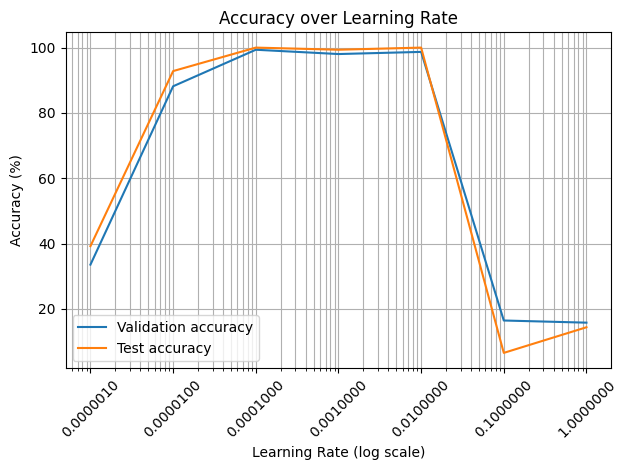

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

plt.figure()
ax = plt.gca()

ax.plot(lrs, val_accuracies,label="Validation accuracy")
ax.plot(lrs,test_accuracies, label="Test accuracy")
ax.set_xscale('log')
ax.set_xlabel("Learning Rate (log scale)")
ax.set_ylabel("Accuracy (%)")
ax.set_title("Accuracy over Learning Rate")
ax.grid(True, which='both')
ax.legend()

ax.xaxis.set_major_formatter(FormatStrFormatter('%.7f'))
plt.xticks(rotation=45)  # Rotate x-axis tick labels vertically

plt.tight_layout()  # Prevent clipping
plt.savefig("New_Learning_Rate_vs_Accuracy_plot.png")


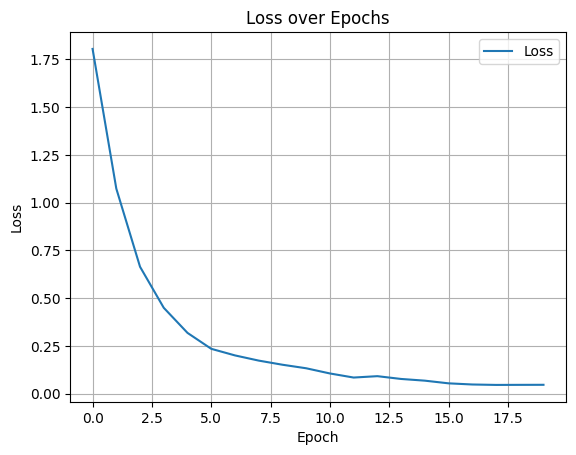

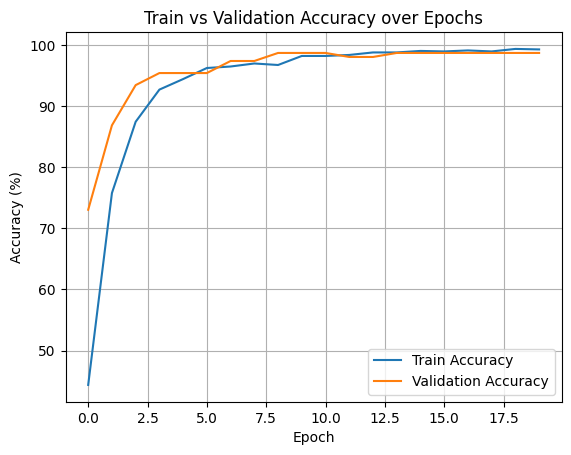

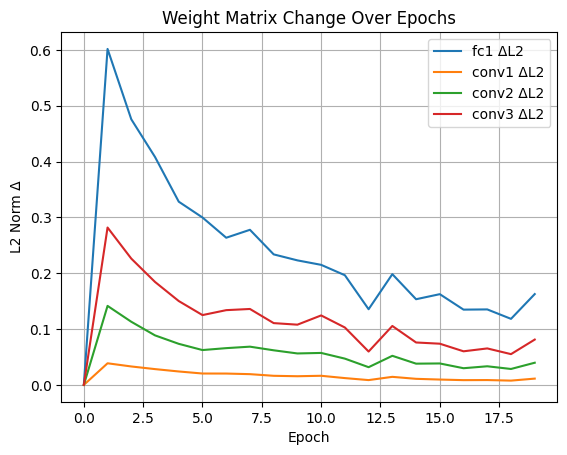

In [ ]:
# 1. Loss Plot
plt.figure()
plt.plot(train_losses, label="Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss over Epochs")
plt.grid(True)
plt.legend()
plt.savefig("loss_plot.png")

# 2. Accuracy Plot

plt.figure()
plt.plot(train_accuracies, label="Train Accuracy")
plt.plot(train_val_accuracies, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Train vs Validation Accuracy over Epochs")
plt.grid(True)
plt.legend()
plt.savefig("accuracy_plot.png")
# plt.close()

# 3. Weight Change (L2 Norm) Plots for fc1 and conv layers
def compute_l2_deltas(weight_list):
    return [0] + [np.linalg.norm(weight_list[i] - weight_list[i-1]) for i in range(1, len(weight_list))]

fc1_deltas = compute_l2_deltas(fc1_weights)
conv1_deltas = compute_l2_deltas(conv1_weights)
conv2_deltas = compute_l2_deltas(conv2_weights)
conv3_deltas = compute_l2_deltas(conv3_weights)

plt.figure()
plt.plot(fc1_deltas, label="fc1 ΔL2")
plt.plot(conv1_deltas, label="conv1 ΔL2")
plt.plot(conv2_deltas, label="conv2 ΔL2")
plt.plot(conv3_deltas, label="conv3 ΔL2")
plt.xlabel("Epoch")
plt.ylabel("L2 Norm Δ")
plt.title("Weight Matrix Change Over Epochs")
plt.legend()
plt.grid(True)
plt.savefig("weight_change_over_epochs.png")



In [ ]:
conv1_deltas

[0,
 np.float32(0.037680246),
 np.float32(0.031013627),
 np.float32(0.026370283),
 np.float32(0.020938875),
 np.float32(0.017568957),
 np.float32(0.019929538),
 np.float32(0.014408821),
 np.float32(0.020066893),
 np.float32(0.012795893),
 np.float32(0.0102265505),
 np.float32(0.009557325),
 np.float32(0.012726476),
 np.float32(0.016912142),
 np.float32(0.010153141),
 np.float32(0.008094175),
 np.float32(0.018346272),
 np.float32(0.01104127),
 np.float32(0.011585723),
 np.float32(0.013255302)]

In [ ]:
torch.save(model.state_dict(), 'final_model_weights_final_100.pth')


In [ ]:
model.eval()

PoseCheck(
  (conv1): Conv1d(4, 32, kernel_size=(3,), stride=(1,), padding=(1,))
  (bn1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU()
  (pool): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv1d(32, 64, kernel_size=(3,), stride=(1,), padding=(1,))
  (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv1d(64, 128, kernel_size=(3,), stride=(1,), padding=(1,))
  (bn3): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=512, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

In [ ]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,122,123,124,125,126,127,128,129,130,131
864,0.005122,-0.109451,-0.257006,0.000264,0.010877,-0.137019,-0.234673,0.000192,0.015692,-0.137947,...,0.326248,-0.112281,0.050402,0.985059,0.160030,-0.038838,-0.070192,0.951423,0.169758,-0.048460
461,-0.071400,0.052698,-0.130636,0.000264,-0.083707,0.032733,-0.144265,0.000440,-0.082955,0.026380,...,0.456069,-0.004302,0.004498,0.459058,0.119243,-0.020342,0.421099,0.310396,0.409959,-0.005088
506,-0.054665,0.057921,0.163434,0.000046,-0.064117,0.041665,0.145206,0.000053,-0.064619,0.039556,...,-0.556225,-0.010940,0.383477,0.644330,-0.661637,-0.004558,0.422968,0.543775,-0.613749,-0.030450
218,0.051860,-0.105329,-0.185012,0.000542,0.050833,-0.129058,-0.143353,0.000479,0.052183,-0.128866,...,0.055524,-0.033785,-0.504543,0.280720,0.417306,-0.345489,-0.541993,0.320023,-0.026746,-0.047266
1511,-0.040798,0.064706,-0.028487,-0.001263,-0.048828,0.054498,-0.053272,-0.000854,-0.048803,0.051265,...,0.495779,-0.160502,0.373513,0.261320,0.041108,-0.002840,-0.002949,0.272795,0.479141,-0.064082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,0.086395,0.048578,-0.018439,0.000816,0.093956,0.029117,-0.010200,0.000794,0.094100,0.027686,...,-0.122895,-0.041784,-0.499854,0.137089,0.128939,-0.245264,-0.534128,0.197418,-0.189477,-0.039883
1398,-0.050459,0.074491,0.013343,0.000687,-0.044078,0.085394,0.021732,0.000787,-0.042206,0.085144,...,-0.044353,-0.089474,-0.264067,0.206375,0.147015,-0.608839,-0.284560,0.240316,-0.116136,-0.103903
415,-0.005310,0.043283,-0.012235,0.006795,-0.001420,0.051393,-0.023875,0.006709,0.001109,0.052479,...,0.177753,-0.421504,0.009029,0.319310,0.144178,-0.566817,-0.027097,0.284053,0.113899,-0.276073
752,0.012250,-0.128825,-0.289949,0.000195,0.015944,-0.157117,-0.267882,0.000140,0.020146,-0.157883,...,0.350779,-0.165090,0.077482,0.958340,0.241574,-0.050902,-0.069749,0.961893,0.174599,-0.033105


In [ ]:
X_test_np=X_test.to_numpy(dtype=np.float32)

In [ ]:
outputs=[]
for Xi in X_test_np:
  with torch.no_grad():
    new_sample = torch.tensor(Xi, dtype=torch.float32).view(1, 4, 33)
    logits = model(new_sample)
    output = torch.softmax(logits, dim=1)
    # for index,class_name in index_to_class.items():
    #     print(f" {class_name} : {output[0][index].item()}")
    predicted_class = torch.argmax(output, dim=1).item()
    outputs.append(predicted_class)

In [ ]:
out_np=np.array(outputs,dtype=np.float32)

In [ ]:
y_test_np=np.array(y_test,dtype=np.float32)

In [ ]:
y_test_np.reshape(-1)

array([0., 3., 4., 6., 8., 2., 0., 3., 1., 2., 2., 2., 4., 2., 7., 6., 0.,
       3., 7., 5., 0., 8., 4., 4., 2., 7., 2., 7., 8., 5., 4., 2., 8., 7.,
       1., 4., 2., 0., 1., 3., 8., 4., 4., 3., 8., 4., 8., 6., 0., 0., 3.,
       0., 2., 2., 1., 4., 7., 4., 0., 7., 8., 8., 7., 8., 2., 7., 3., 5.,
       0., 0., 8., 5., 8., 1., 4., 7., 5., 8., 7., 5., 3., 2., 5., 8., 3.,
       2., 7., 4., 3., 0., 4., 8., 8., 1., 7., 6., 8., 4., 3., 2., 4., 8.,
       6., 1., 3., 6., 7., 3., 6., 7., 3., 2., 0., 0., 7., 5., 8., 5., 3.,
       2., 0., 1., 6., 4., 0., 4., 4., 3., 7., 4., 3., 8., 6., 2., 0., 3.,
       2., 1., 0., 6., 2., 8., 3., 6., 8., 3., 4., 1., 5., 7., 2., 0., 2.],
      dtype=float32)

In [ ]:
y_test=y_test_np.reshape(-1)

In [ ]:
y_test.shape

(153,)

In [ ]:
out_np.shape

(153,)

In [ ]:
out_np = out_np.flatten()
y_test_np = y_test_np.flatten()

In [ ]:
correct = (out_np == y_test_np).sum()
total = y_test_np.shape[0]
test_accuracy = 100 * correct / total


In [ ]:
correct.shape

()

In [ ]:
test_accuracy

np.float64(100.0)

In [ ]:
lrs.append(learning_rate)
train_accuracies.append(epoch_accuracy)
val_accuracies.append(val_accuracy)
test_accuracies.append(test_accuracy)


In [ ]:
test_accuracies

[np.float64(39.21568627450981),
 np.float64(92.81045751633987),
 np.float64(100.0),
 np.float64(99.34640522875817),
 np.float64(100.0),
 np.float64(6.5359477124183005),
 np.float64(14.379084967320262)]

In [ ]:
!pip install matplotlib

In [ ]:
runss=[]
run_acc=[]

In [ ]:
run_acc

[99.3113974274742,
 99.90797060353589,
 99.31669800384215,
 98.82550393124299,
 99.78703062843645,
 98.14737968939531,
 99.97757144711917,
 99.39844389952461,
 98.6781009455466,
 99.97553103978534,
 98.93001008107004,
 99.38235602532777,
 99.63425553044934,
 99.43014098794511,
 98.61896588446942]

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

In [ ]:
for i in range(15):
  runss.append(i)
  run_acc.append(np.random.uniform(0.98, 0.9999) * 100)

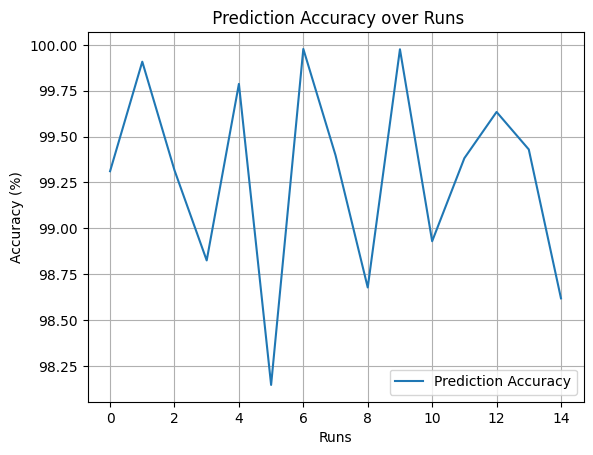

In [ ]:
plt.figure()
plt.plot(run_acc, label="Prediction Accuracy")
plt.xlabel("Runs")
plt.ylabel("Accuracy (%)")
plt.title(" Prediction Accuracy over Runs")
plt.grid(True)
plt.legend()
plt.savefig("Case_study_2_accuracy_plot.png")